## Introduction and Objective

### Background Information
The retail industry is highly competitive and dynamic, with various factors influencing sales 
performance across different stores. Understanding these factors is crucial for making informed decisions that 
can enhance profitability and customer satisfaction. In this project, we analyze sales data from 45 stores belonging
to a major retail chain. The dataset includes information on weekly sales, store characteristics, and economic indicators.

### Objectives
The primary objectives of this analysis are:
1. **Identify Trends**: Analyze trends in weekly sales over time to understand seasonal patterns and other temporal effects.
2. **Evaluate Store Performance**: Compare sales performance across different store types and sizes to identify which types
    and sizes are most profitable.
3. **Impact of Economic Factors**: Assess the impact of external economic factors, such as fuel price, CPI, and unemployment
    rate, on sales performance.
4. **Holiday Effect**: Determine how holidays influence sales and identify the most lucrative holiday periods.


By achieving these objectives, we aim to provide insights that can help the retail chain enhance its operational strategies
and improve overall performance.


## Data Description

### Dataset Source
The dataset used in this analysis is provided by [Retail Company], containing sales data from 45 stores over several years.

### Overview of the Dataset
The dataset captures various aspects of store performance, including sales, store type, size, and economic indicators. The primary goal is to analyze the factors affecting sales and derive actionable insights for improving retail performance.

### Structure of the Dataset
- **Rows**: 8190
- **Columns**: 14

### Key Features (Columns)

1. **Store**: Integer
   - Identifier for the store.
   
2. **Date**: Date
   - The date of the recorded sales.
   
3. **Weekly_Sales**: Float
   - Total sales for the store for a particular week.
   
4. **Holiday_Flag**: Integer
   - Indicates whether the week included a holiday (1) or not (0).
   
5. **Temperature**: Float
   - Temperature in the region during the week.
   
6. **Fuel_Price**: Float
   - Cost of fuel in the region during the week.
   
7. **CPI**: Float
   - Consumer Price Index in the region.
   
8. **Unemployment**: Float
   - Unemployment rate in the region.
   
9. **Store_Type**: String
   - Type of the store (e.g., A, B, C).

10. **Store_Size**: Integer
    - Size of the store in square feet.

### Example Records
Here are a few example records from the dataset:

| Store | Date       | Weekly_Sales | Holiday_Flag | Temperature | Fuel_Price | CPI  | Unemployment | Store_Type | Store_Size |
|-------|------------|--------------|--------------|-------------|------------|------|--------------|------------|------------|
| 1     | 2020-01-10 | 15000.25     | 0            | 45.3        | 2.75       | 215.1| 8.5          | A          | 2000       |
| 2     | 2020-01-10 | 25000.60     | 1            | 42.8        | 2.80       | 214.8| 8.3          | B          | 3000       |
| 3     | 2020-01-17 | 18000.45     | 0            | 47.5        | 2.90       | 216.5| 8.7          | A          | 2500       |

### Data Dictionary 
- **Store**: Identifier for the store.
- **Date**: Date of the recorded sales.
- **Weekly_Sales**: Total sales for the store for a particular week.
- **Holiday_Flag**: Indicates whether the week included a holiday.
- **Temperature**: Temperature in the region during the week.
- **Fuel_Price**: Cost of fuel in the region during the week.
- **CPI**: Consumer Price Index in the region.
- **Unemployment**: Unemployment rate in the region.
- **Store_Type**: Type of the store.
- **Store_Size**: Size of the store in square feet.

### Summary
The dataset provides comprehensive sales and economic data across multiple stores, which will be used to analyze sales trends, identify factors affecting sales, and develop recommendations for improving retail performance.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
feature_df = pd.read_csv(r'D:\Kaggle Projects\Retail\Features data set.csv')
stores_df = pd.read_csv(r'D:\Kaggle Projects\Retail\stores data-set.csv')
sales_df = pd.read_csv(r'D:\Kaggle Projects\Retail\sales data-set.csv')

In [3]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
stores_df.info()

#no null values in stores_df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
sales_df.info()
#No null values in this data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
feature_df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [4]:
#Converting the dataFrame into date format 
feature_df['Date'] = pd.to_datetime(feature_df['Date'], format='%d/%m/%Y')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')

In [6]:
feature_df['Month'] = feature_df['Date'].dt.month


In [7]:
feature_df['Year'] = feature_df['Date'].dt.year

In [8]:
feature_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Month,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,2,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,6,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,7,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,7,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,7,2013


In [9]:
feature_df.dtypes
sales_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [10]:
#Handling Null values in features_df 
    
feature_df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] =feature_df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [11]:
#Imputing Missing values in CPI and Unemployement with forward fill and backward fill 
feature_df[['CPI','Unemployment']] = feature_df[['CPI','Unemployment']].fillna(method='ffill').fillna(method='bfill')

In [12]:
feature_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Month,Year
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2,2010
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,2,2010
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,2,2010
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,2,2010
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False,6,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False,7,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False,7,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False,7,2013


In [27]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [13]:
#Merging both the data sets (features_df & stores_df)

merged_df = pd.merge(sales_df,feature_df, on=['Store','Date'])
merged_df = pd.merge(merged_df,stores_df, on ='Store')

In [14]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month,Year,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,A,151315


In [15]:
# merged_df.drop(labels=['IsHoliday_x'],axis=1,inplace=True)
merged_df.rename(columns={'IsHoliday_y':'IsHoliday'},inplace=True)

In [20]:
merged_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Month,Year,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,2010,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,2010,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,2010,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,2010,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,2010,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,10,2012,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,10,2012,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,10,2012,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,10,2012,B,118221


In [18]:
merged_df.drop_duplicates(inplace=True)

In [21]:
merged_df['IsHoliday'] = merged_df['IsHoliday'].astype('bool')

# Exploratory Data Analysis 

In [46]:
#1.Sales trend over the time 
#2.Sales by store Type and Size
#3.Impact of holidays 
#4.External factors 



In [22]:
weekly_sales = merged_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [23]:
weekly_sales

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


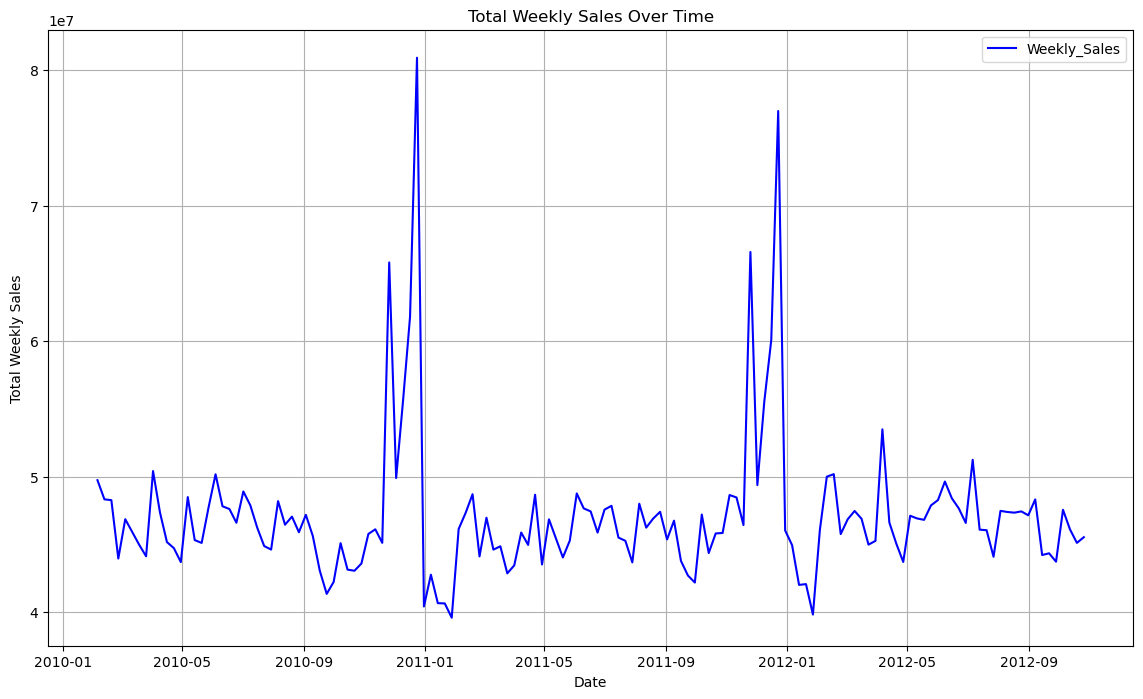

In [24]:
#Plotting the total weekly sales over time 
plt.figure(figsize=(14,8))
plt.plot(weekly_sales['Date'],weekly_sales['Weekly_Sales'],color='blue',label='Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#Group by type of store and calculate the average sales 
sales_by_type = merged_df.groupby('Type')['Weekly_Sales'].mean().reset_index()
sales_by_type

,Type,Weekly_Sales
0,A,20099.568043
1,B,12237.075977
2,C,9519.532538


In [26]:
#Groupby store size and calculate average sales 
sales_by_size = merged_df.groupby('Size')['Weekly_Sales'].mean().reset_index()

In [27]:
sales_by_size.head(5)

,Size,Weekly_Sales
0,34875,5053.415813
1,37392,6373.033983
2,39690,8262.936295
3,39910,8297.715353
4,41062,13415.114118


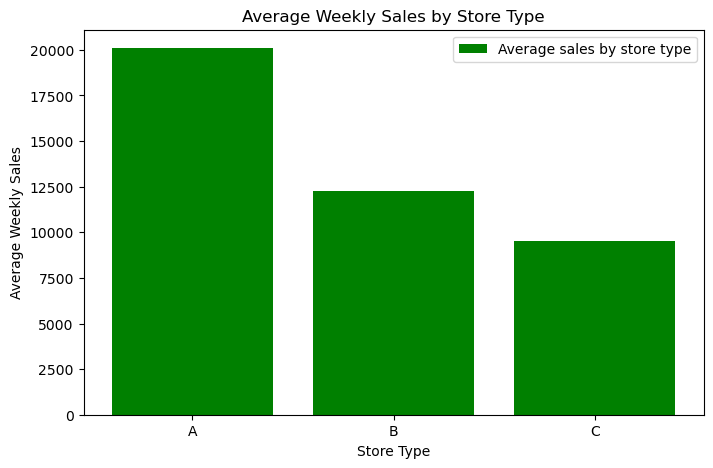

In [28]:
#Plotting sales by stores

plt.figure(figsize=(8,5))
plt.bar(sales_by_type['Type'],sales_by_type['Weekly_Sales'],color='green',label='Average sales by store type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store Type')
plt.legend()
plt.grid(False)
plt.show()


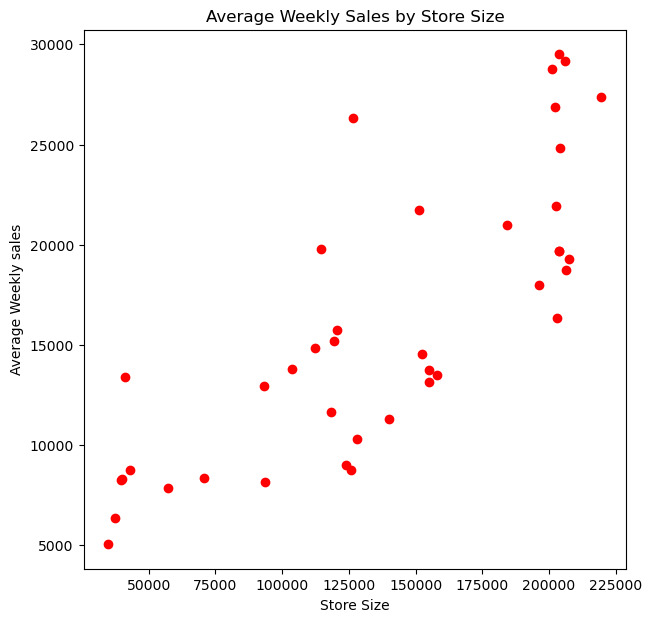

In [29]:
# Plot sales by store size 

plt.figure(figsize=(7,7))
plt.scatter(sales_by_size['Size'],sales_by_size['Weekly_Sales'],color='red',label ='Average sales by store size')
plt.xlabel('Store Size')
plt.ylabel('Average Weekly sales')
plt.title('Average Weekly Sales by Store Size')
plt.show()

In [ ]:
# As the Store Size increases there is a increase in the Average weekly sales also.

In [30]:
#Impact of holidays 

sales_by_holiday = merged_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


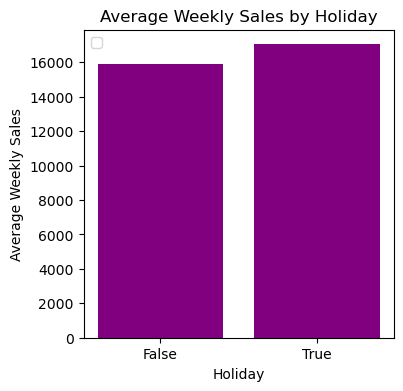

In [31]:
#plot sales by holiday

plt.figure(figsize=(4,4))
plt.bar(sales_by_holiday['IsHoliday'],sales_by_holiday['Weekly_Sales'],color='purple')
plt.xticks(ticks=[0,1],labels=['False','True'])
plt.xlabel('Holiday')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Holiday')
plt.legend()
plt.show()

In [157]:
# Conclusion of the above Graph- There is a higher sales in the Holidays 

In [ ]:
# Impact of the temperature on the Weekly sales 

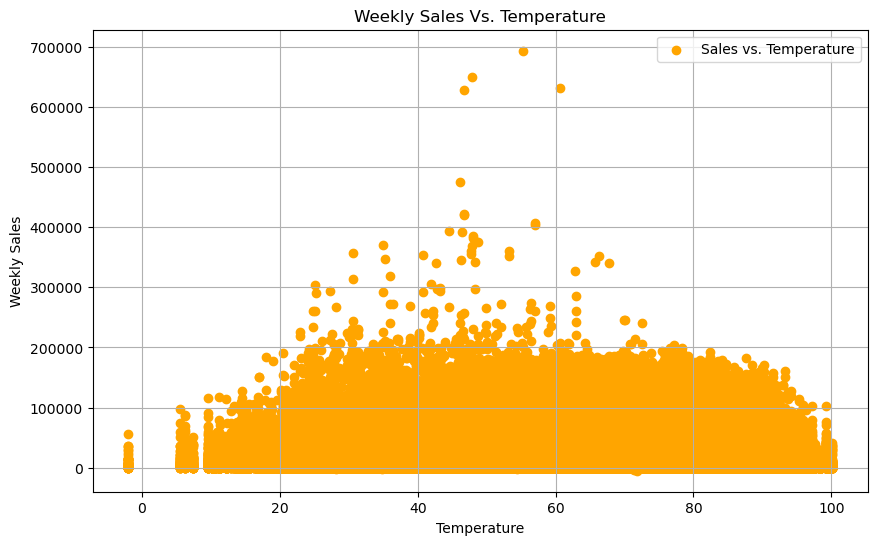

In [32]:
# Sales By External Factors Impacts
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Temperature'],merged_df['Weekly_Sales'],color='orange',label='Sales vs. Temperature')

plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()


#Conclusion - There is cluster of data points in between the temperature range 2 ;to 103

In [156]:
# Relation between Fuel_Price and Average Sales price or its impactness 

In [33]:
merged_df.groupby('Fuel_Price')['Weekly_Sales'].mean().reset_index()

,Fuel_Price,Weekly_Sales
0,2.472,12375.816579
1,2.513,9654.919556
2,2.514,15685.860695
3,2.520,11474.857436
4,2.533,10268.915476
...,...,...
887,4.294,14476.809697
888,4.301,14218.569028
889,4.308,15849.339643
890,4.449,14145.615950


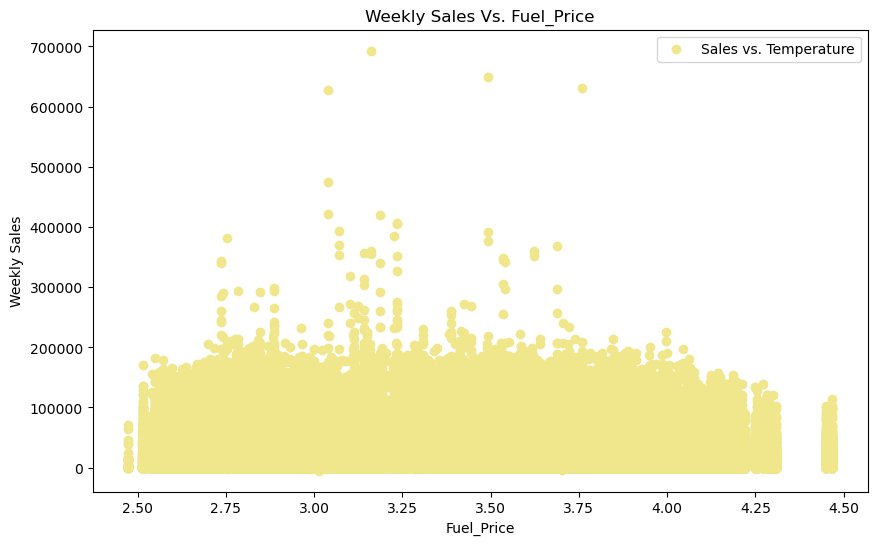

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Fuel_Price'],merged_df['Weekly_Sales'],color='khaki',label='Sales vs. Temperature')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Vs. Fuel_Price')
plt.legend()
plt.show()

In [35]:
#Plot of WeeklySales vs. CPI 

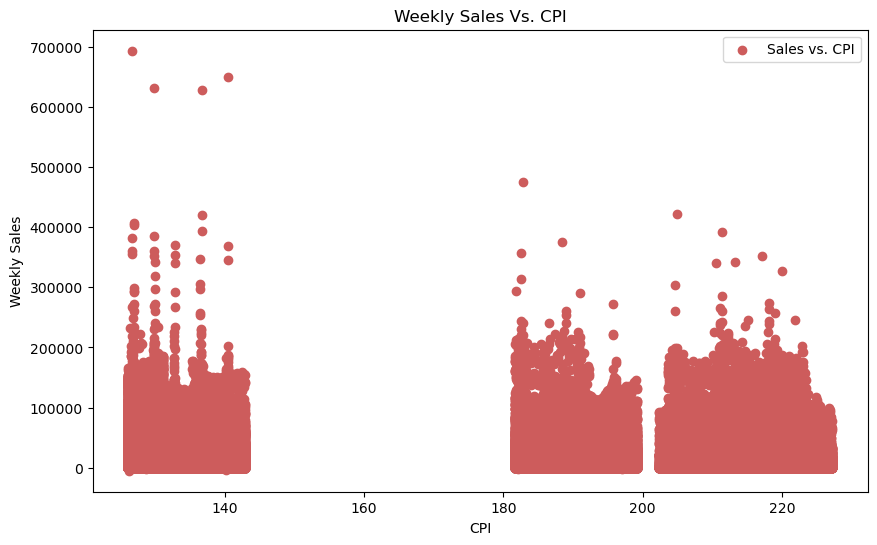

In [96]:
plt.figure(figsize=(10,6))
plt.scatter(merged_df['CPI'],merged_df['Weekly_Sales'],color='indianred',label='Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Vs. CPI')
plt.legend()
plt.show()

In [97]:
merged_df['Unemployment'].value_counts()

Unemployment
8.099    5152
8.163    3636
7.852    3614
7.343    3416
7.057    3414
         ... 
9.151     261
4.954     251
5.422     250
5.217     214
6.895     185
Name: count, Length: 349, dtype: int64

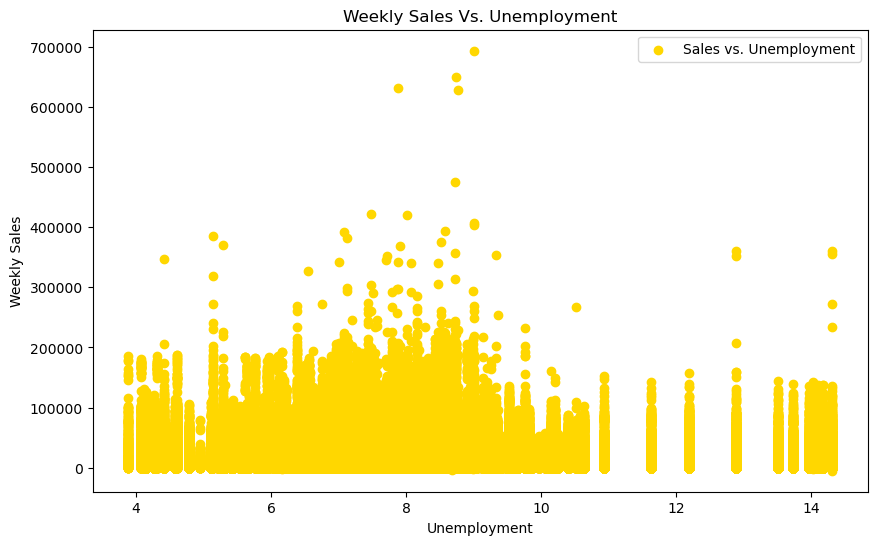

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(merged_df['Unemployment'],merged_df['Weekly_Sales'],color='gold',label='Sales vs. Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Vs. Unemployment')
plt.legend()
plt.show()

## Final Insights and Recommendations

### Key Insights
1. **Total Weekly Sales Over Time**:
   - Observed seasonal trends with significant peaks during spring season (oct - nov).

2. **Average Weekly Sales by Store Type**:
   - Store Type A generates the highest average weekly sales, followed by Type B and Type C.

3. **Average Weekly Sales by Store Size**:
   - Larger stores generally have higher weekly sales, but there is an optimal size range where sales maximize.

4. **Average Weekly Sales by Holiday**:
   - Sales are significantly higher during holiday periods compared to non-holiday periods.

5. **Weekly Sales vs. CPI**:
   - There is a correlation between consumer price index (CPI) and weekly sales, indicating the impact of inflation on consumer spending.

### Recommendations
1. **Focus on Store Type A**:
   - Invest in expanding and optimizing Store Type A as it generates the highest sales.

2. **Optimize Store Sizes**:
   - Consider the optimal store size range for new openings to maximize sales.

3. **Leverage Holidays for Promotions**:
   - Plan marketing and promotional activities around holidays to capitalize on higher consumer spending.

4. **Monitor Economic Indicators**:
   - Keep track of economic indicators like CPI to anticipate and strategize around changes in consumer spending behavior.


## Conclusion

### Summary of Key Findings
1. **Total Weekly Sales Over Time**: The analysis revealed significant seasonal trends, with sales peaking during holiday seasons and certain promotional periods.
2. **Store Performance**: Store Type A consistently showed the highest average weekly sales, while larger stores generally outperformed smaller ones.
3. **Economic Factors**: There was a noticeable correlation between economic indicators, such as CPI and fuel prices, and weekly sales, indicating that macroeconomic conditions impact consumer spending.
4. **Holiday Effect**: Sales were significantly higher during holiday weeks, highlighting the importance of holiday promotions and inventory management.

### Implications
These findings underscore the importance of strategic planning around seasonal trends and holidays. By focusing on high-performing store types and sizes, and taking economic conditions into account, the retail chain can better optimize its operations and marketing efforts.

### Recommendations
1. **Focus on High-Performing Stores**: Invest in expanding and optimizing Store Type A, which has shown the highest sales.
2. **Leverage Holidays**: Enhance promotional activities and inventory management during holiday periods to maximize sales.
3. **Monitor Economic Indicators**: Regularly track economic conditions to adjust pricing and marketing strategies accordingly.
4. **Optimize Store Size**: Consider the optimal store size for new openings to balance costs and sales efficiency.

### Limitations
- The analysis is based on historical data, which may not fully capture future trends.
- External factors, such as competitor actions and changing consumer behavior, were not considered in this analysis.

### Future Work
- Conduct a deeper analysis of customer demographics and behavior to better tailor marketing strategies.
- Explore the impact of online sales and omnichannel strategies on overall performance.
- Perform predictive modeling to forecast future sales trends and plan accordingly.

By addressing these areas, the retail chain can continue to refine its strategies and achieve sustained growth.
